# Web Scraping Genius for Eminem Lyrics

## Imports

In [184]:
import numpy as np
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import ast
import os
import pandas as pd
import time
import requests
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns 
import wordcloud
from sklearn.manifold import TSNE

# Lyrics Genius API

In [8]:
import lyricsgenius
genius_api_token = 'insert_your_unique_token_here'
genius = lyricsgenius.Genius(genius_api_token)
genius.verbose = True # Turn off status messages
genius.remove_section_headers = False # Remove section headers (e.g. [Chorus]) from lyrics when searching
genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)", "(live)", "(Instrumental)",
                         "Diss-Mas", "'The Equalizer : Soundtrack'",
                        "(A Cappella)", "(Radio Edit)",
                        "(Clean Radio Edit)", "(Skit)",
                        'Freestyle on Beats 1 (Ft. Kurupt)',
                        '(Snippet)', "."] # Exclude songs with these words in their title
# if lyrics none can we skip or exclude?

In [4]:
# having api search and collect data on eminem songs. The below line is hashed out so it doesn't run (it'll take awhile)
# eminem_with_headers = genius.search_artist("Eminem", max_songs=583, sort="title")

In [6]:
eminem_with_headers.songs

[('.', 'Eminem'),
 ('12 Days of Diss-Mas', 'Eminem'),
 ('1-833-2GET-REV (REVIVAL Voicemail)', 'Eminem'),
 ('1996 Underground Freestyle', 'Eminem'),
 ('1997 Freestyle Live at Wetlands, NYC', 'Eminem'),
 ('1997 Rap Olympics', 'Eminem'),
 ('1999', 'Eminem'),
 ('1999 Tim Westwood Freestyle', 'Eminem'),
 ('2004 Tim Westwood Freestyle', 'Eminem'),
 ('2012 Something From Nothing: Art of Rap Freestyle', 'Eminem'),
 ('2.0 Boys', 'Eminem'),
 ('25 To Life', 'Eminem'),
 ('313', 'Eminem'),
 ('3 a.m.', 'Eminem'),
 ('3 Verses', 'Eminem'),
 ('4 Verses', 'Eminem'),
 ('50 Ways', 'Eminem'),
 ('8 Mile', 'Eminem'),
 ('8 Mile: 313 Cypher (Chin Tiki Girls)', 'Eminem'),
 ('8 Mile Background Music', 'Eminem'),
 ('8 Mile: B-Rabbit vs Papa Doc', 'Eminem'),
 ('8 Mile: B-Rabbit vs Supa Emcee', 'Eminem'),
 ('8 Mile: Cheddar Bob Freestyle', 'Eminem'),
 ('8 Mile: D’Phuzion vs B-Rabbit', 'Eminem'),
 ('8 Mile: Lily’s Lullaby', 'Eminem'),
 ('8 Mile: Lotto vs B-Rabbit', 'Eminem'),
 ('8 Mile: Lyckety-Splyt vs B-Rabbit', '

In [ ]:
# eminem = genius.search_artist("Eminem", max_songs=583, sort="title") # having api search for eminem songs.
# this will automatically have up to 583 songs in eminem object. I should be able to save_lyrics after this

In [7]:
len(eminem_with_headers.songs)

582

In [ ]:
songs = eminem.songs

In [ ]:
len(songs)

In [ ]:
eminem

In [8]:
# eminem_with_headers.save_lyrics()
# saving lyrics of songs to json file. above line is hased out so no overwriting of previous file occurs

Wrote `Lyrics_Eminem.json`


# Working with json File for Data Framing

In [110]:
with open('./Lyrics_Eminem.json') as json_file:
    data = json.load(json_file)

In [111]:
with open('./Lyrics_Eminem_without_headers.json') as json_file:
    data_without_headers = json.load(json_file)

In [112]:
len(data)

20

In [113]:
len(data['songs'])

582

In [114]:
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [115]:
data['songs'][25]['lyrics']

'[Lotto (Nashawn \'Ox\' Breedlove)]\nYo, I\'ll spit a racial slur, honky, sue me\nThe shit is a horror flick, but the black guy doesn\'t die in this movie\nFuckin\' with Lotto? Dawg, you gotta be kiddin\'\nThat makes me believe you really don\'t have an interest in livin\'\nYou think these niggas gon\' feel the shit you say?\nI got a better chance joinin\' the KKK\nOn some real shit though, I like you\nThat\'s why I didn\'t wanna have to be the one you commit suicide to\nFuck "Lotto," call me your leader\nI feel bad that I gotta murder that dude from \'Leave It To Beaver\'\nI used to like that show, now you got me in fight-back mode\nBut oh well, if you gotta go, then you gotta go\nI hate to do this, I would love for this shit to last\nSo I\'ll take pictures of my rear end so you won\'t forget my ass\nAnd all\'s well that ends okay\nSo I\'ll end this shit with a "Fuck you", but "Have a nice day!"\n\n[B-Rabbit (Eminem)]\nWard, I think you were a little hard on the Beaver\nSo was Eddie H

In [116]:
# maybe add album filter to song lyrics function if i only want official album lyrics and songs

# row index will be song names
# 1 column will be lyrics, other columns other info that will be nice for organizing and EDA

In [117]:
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [118]:
final_dict['Godzilla']

['[Intro]',
 "Ugh, you're a monster",
 '',
 '[Verse 1: Eminem]',
 "I can swallow a bottle of alcohol and I'll feel like Godzilla",
 'Better\u2005hit\u2005the deck like\u2005the card dealer',
 "My whole squad's in\u2005here, walking around the party",
 'A cross between a zombie apocalypse and B-Bobby "The',
 'Brain" Heenan which is probably the',
 'Same reason I wrestle with mania',
 "Shady's in this bitch, I'm posse'd up",
 'Consider it to cross me a costly mistake',
 "If they sleepin' on me, the hoes better get insomnia",
 'ADHD, Hydroxycut',
 "Pass the Courvoisi' (Hey, hey)",
 'In AA with an AK, melee, finna set it like a playdate',
 'Better vacate, retreat like a vacay, mayday',
 'This beat is cray-cray, Ray J, H-A-H-A-H-A',
 'Laughing all the way to the bank, I spray flames',
 'They cannot tame or placate the',
 '',
 '[Chorus: Juice WRLD with Eminem]',
 'Monster',
 "You get in my way, I'ma feed you to the monster (Yeah)",
 "I'm normal during the day, but at night, turn to a monster

In [191]:
final_dict['Lose Yourself']

['[Intro]',
 'Look, if you had one shot or one opportunity',
 'To seize everything you ever wanted in one moment',
 'Would you capture it, or just let it slip? Yo',
 '',
 '[Verse 1]',
 'His palms are sweaty, knees weak, arms are heavy',
 "There's vomit on his sweater already, mom's spaghetti",
 "He's nervous, but on the surface he looks calm and ready",
 'To drop bombs, but he keeps on forgetting',
 'What he wrote down, the whole crowd goes so loud',
 "He opens his mouth, but the words won't come out",
 "He's choking, how? Everybody's joking now",
 "The clock's run out, time's up, over—blaow!",
 'Snap back to reality, ope there goes gravity, ope',
 "There goes Rabbit, he choked, he's so mad but he won't",
 "Give up that easy, no, he won't have it, he knows",
 "His whole back's to these ropes, it don't matter, he's dope",
 "He knows that but he's broke, he's so stagnant, he knows",
 "When he goes back to this mobile home, that's when it's",
 'Back to the lab again yo, this old rap shit,

In [119]:
final_dict['Beautiful']

['[Intro]',
 "Lately I've been hard to reach",
 "I've been too long on my own",
 'Everybody has a private world',
 'Where they can be alone',
 'Are you calling me?',
 'Are you trying to get through?',
 'Are you reaching out for me?',
 "Then I'm reaching out for you",
 '',
 '[Verse 1]',
 "I'm just so fuckin' depressed",
 "I just can't seem to get out this slump",
 'If I could just get over this hump',
 "But I need somethin' to pull me out this dump",
 'I took my bruises, took my lumps',
 'Fell down and I got right back up',
 'But I need that spark to get psyched back up',
 'In order for me to pick the mic back up',
 "I don't know how or why or when",
 "I ended up in this position I'm in",
 "I'm starting to feel distant again",
 'So I decided just to pick this pen',
 'Up and try to make an attempt to vent',
 "But I just can't admit",
 'Or come to grips with the fact that I may be done with rap',
 'I need a new outlet',
 "And I know some shit's so hard to swallow",
 "But I just can't sit 

In [120]:
final_dict['Love the Way You Lie'] # should I make this a new key within this dictionary and the text after it the value?
# should i repeat the process of key/value pairs and nested dictionaries

['[Chorus: Rihanna]',
 'Just gonna stand there and watch me burn?',
 "Well, that's all right because I like the way it hurts",
 'Just gonna stand there and hear me cry?',
 "Well, that's all right because I love the way you lie",
 'I love the way you lie',
 '',
 '[Verse 1: Eminem]',
 "I can't tell you what it really is, I can only tell you what it feels like",
 "And right now, there's a steel knife in my windpipe",
 "I can't breathe, but I still fight while I can fight",
 "As long as the wrong feels right, it's like I'm in flight",
 'High off her love, drunk from her hate',
 "It's like I'm huffin' paint and I love her, the more I suffer, I suffocate",
 "And right before I'm about to drown, she resuscitates",
 'Me, she fuckin\' hates me, and I love it — "Wait!',
 'Where you going?" — "I\'m leaving you!" — "No, you ain\'t!',
 'Come back!" — We\'re runnin\' right back, here we go again',
 "It's so insane, 'cause when it's goin' good, it's goin' great",
 "I'm Superman with the wind at his b

In [121]:
# def get_chorus(song):
#     if '[Chorus]' in song:
#         chorus = song.index('[Chorus]'):song.index(lambda x: x in lyric_headers)]
#         chorus_list.append(chorus)

SyntaxError: invalid syntax (<ipython-input-121-0fd2a03f96bc>, line 3)

In [122]:
# song_index_number = 0
# line_index_in_song = 0
# lyric_headers = ['[Pre-Chorus]', '[Chorus]', '[Verse 1]', '[Verse 2]',
#                  '[Verse 3]', '[Verse 4]', '[Verse 5]', '[Intro]',
#                  '[Outro]', '[Bridge]']
# intro_list = []
# verse1_list = []
# chorus_list = []
# verse2_list = []
# verse3_list = []
# outro_list = []
# pre_chorus_list = []
# bridge_list = []

# for song in lyrics_by_song:
#     song_index_number =+ 1
#     if '[Chorus]' in lyrics_by_song[song_index_number]:
#         chorus = lyrics_by_song[lyrics_by_song[song_index_number].index('[Chorus]'):lambda x: x in lyric_headers]
#         chorus_list.append(chorus)
#     verse1 = lyrics_by_song[lyrics_by_song[song_index_number].index('[Verse 1]'):lyrics_by_song[song_index_number].index('[Chorus]')]
#     verse2 = lyrics_by_song[lyrics_by_song[song_index_number].index('[Verse 2]'):lyrics_by_song[song_index_number].index('[Chorus]')]
#     verse3 = lyrics_by_song[lyrics_by_song[song_index_number].index('[Verse 3]'):lyrics_by_song[song_index_number].index('[Chorus]')]
#     bridge = lyrics_by_song[lyrics_by_song[song_index_number].index('[Bridge]'):lyrics_by_song[song_index_number].index('[Outro]')]
#     outro = lyrics_by_song[lyrics_by_song[song_index_number].index('[Outro]'):]    
#     if '[Intro]' in lyrics_by_song[song_index_number]:
#         intro = lyrics_by_song[lyrics_by_song[song_index_number].index('[Intro]'):lyrics_by_song[song_index_number].index('[Verse 1]')]
#         intro_list.append(intro)
#     if '[Pre-Chorus]' in lyrics_by_song[song_index_number]:
#         pre_chorus = lyrics_by_song[lyrics_by_song[song_index_number].index('[Pre-Chorus]'):lyrics_by_song[song_index_number].index('[Chorus]')]
#         pre_chorus_list.append(pre_chorus)

In [88]:
lyrics_by_song = []
album = []
song_names = [] 
song_index_integer = 2 # skipping the first 3 
for song in data['songs']:
    while song_index_integer != len(data['songs']) - 1:
        song_index_integer = song_index_integer + 1
        song_lyrics = data['songs'][song_index_integer]['lyrics']
        song_title = data['songs'][song_index_integer]['title']
        if song_lyrics is None:
            print(f"Skipped lyrics from song #{song_index_integer}: {data['songs'][song_index_integer]['title']}")
            pass
#         elif data['songs'][song_index_integer]['album']['name'] is None:
#             album.append("Non-Album Release")
#             split_song_lyrics = song_lyrics.split('\n')
#             lyrics_by_song.append(split_song_lyrics)
        else:
            split_song_lyrics = song_lyrics.split('\n')
            #album_name = data['songs'][song_index_integer]['album']['name']
            lyrics_by_song.append(split_song_lyrics)
            song_names.append(song_title)
            print(f"Grabbed lyrics from song #{song_index_integer}: {data['songs'][song_index_integer]['title']}")

print(f'Amount of song lyrics: {len(lyrics_by_song)}')
print(f'Amount of songs: {len(song_names)}')
                  
final_dict = dict(zip(song_names, lyrics_by_song)) # song name are keys, lyrics per song are values.

Grabbed lyrics from song #3: 1996 Underground Freestyle
Grabbed lyrics from song #4: 1997 Freestyle Live at Wetlands, NYC
Grabbed lyrics from song #5: 1997 Rap Olympics
Grabbed lyrics from song #6: 1999
Grabbed lyrics from song #7: 1999 Tim Westwood Freestyle
Grabbed lyrics from song #8: 2004 Tim Westwood Freestyle
Grabbed lyrics from song #9: 2012 Something From Nothing: Art of Rap Freestyle
Grabbed lyrics from song #10: 2.0 Boys
Grabbed lyrics from song #11: 25 To Life
Grabbed lyrics from song #12: 313
Grabbed lyrics from song #13: 3 a.m.
Grabbed lyrics from song #14: 3 Verses
Grabbed lyrics from song #15: 4 Verses
Grabbed lyrics from song #16: 50 Ways
Grabbed lyrics from song #17: 8 Mile
Grabbed lyrics from song #18: 8 Mile: 313 Cypher (Chin Tiki Girls)
Grabbed lyrics from song #19: 8 Mile Background Music
Grabbed lyrics from song #20: 8 Mile: B-Rabbit vs Papa Doc
Grabbed lyrics from song #21: 8 Mile: B-Rabbit vs Supa Emcee
Grabbed lyrics from song #22: 8 Mile: Cheddar Bob Freestyle

In [133]:
len(lyrics_by_song) # 564 lists where each list is the lyrics of the song, line by line

564

In [43]:
lyrics_by_song = []
album = []
song_names = [] 
song_index_integer = 2 # skipping the first 3 
for song in data_without_headers['songs']:
    while song_index_integer != len(data_without_headers['songs']) - 1:
        song_index_integer = song_index_integer + 1
        song_lyrics = data_without_headers['songs'][song_index_integer]['lyrics']
        song_title = data_without_headers['songs'][song_index_integer]['title']
        if song_lyrics is None:
            print(f"Skipped lyrics from song #{song_index_integer}: {data_without_headers['songs'][song_index_integer]['title']}")
            pass
#         elif data['songs'][song_index_integer]['album']['name'] is None:
#             album.append("Non-Album Release")
#             split_song_lyrics = song_lyrics.split('\n')
#             lyrics_by_song.append(split_song_lyrics)
        else:
            split_song_lyrics = song_lyrics.split('\n')
            #album_name = data['songs'][song_index_integer]['album']['name']
            lyrics_by_song.append(split_song_lyrics)
            song_names.append(song_title)
            print(f"Grabbed lyrics from song #{song_index_integer}: {data_without_headers['songs'][song_index_integer]['title']}")

len(lyrics_by_song)
len(song_names)
final_dict_without_headers = dict(zip(song_names, lyrics_by_song)) # song name are keys, lyrics per song are values.

Grabbed lyrics from song #3: 1996 Underground Freestyle
Grabbed lyrics from song #4: 1997 Freestyle Live at Wetlands, NYC
Grabbed lyrics from song #5: 1997 Rap Olympics
Grabbed lyrics from song #6: 1999
Grabbed lyrics from song #7: 1999 Tim Westwood Freestyle
Grabbed lyrics from song #8: 2004 Tim Westwood Freestyle
Grabbed lyrics from song #9: 2012 Something From Nothing: Art of Rap Freestyle
Grabbed lyrics from song #10: 2.0 Boys
Grabbed lyrics from song #11: 25 To Life
Grabbed lyrics from song #12: 313
Grabbed lyrics from song #13: 3 a.m.
Grabbed lyrics from song #14: 3 Verses
Grabbed lyrics from song #15: 4 Verses
Grabbed lyrics from song #16: 50 Ways
Grabbed lyrics from song #17: 8 Mile
Grabbed lyrics from song #18: 8 Mile: 313 Cypher (Chin Tiki Girls)
Grabbed lyrics from song #19: 8 Mile Background Music
Grabbed lyrics from song #20: 8 Mile: B-Rabbit vs Papa Doc
Grabbed lyrics from song #21: 8 Mile: B-Rabbit vs Supa Emcee
Grabbed lyrics from song #22: 8 Mile: Cheddar Bob Freestyle

In [89]:
len(lyrics_by_song)

564

In [90]:
type(lyrics_by_song)

list

In [91]:
len(song_names)

564

In [92]:
len(final_dict)

564

In [93]:
final_dict['Beautiful']

['[Intro]',
 "Lately I've been hard to reach",
 "I've been too long on my own",
 'Everybody has a private world',
 'Where they can be alone',
 'Are you calling me?',
 'Are you trying to get through?',
 'Are you reaching out for me?',
 "Then I'm reaching out for you",
 '',
 '[Verse 1]',
 "I'm just so fuckin' depressed",
 "I just can't seem to get out this slump",
 'If I could just get over this hump',
 "But I need somethin' to pull me out this dump",
 'I took my bruises, took my lumps',
 'Fell down and I got right back up',
 'But I need that spark to get psyched back up',
 'In order for me to pick the mic back up',
 "I don't know how or why or when",
 "I ended up in this position I'm in",
 "I'm starting to feel distant again",
 'So I decided just to pick this pen',
 'Up and try to make an attempt to vent',
 "But I just can't admit",
 'Or come to grips with the fact that I may be done with rap',
 'I need a new outlet',
 "And I know some shit's so hard to swallow",
 "But I just can't sit 

In [94]:
df = pd.DataFrame.from_dict(final_dict, orient='index')

In [95]:
df_without_headers = pd.DataFrame.from_dict(final_dict_without_headers, orient='index')

In [96]:
df_without_headers.drop(['Zane Lowe BBC Radio Interview Part 1', 'Zane Lowe BBC Radio Interview Part 2'], inplace=True)

In [97]:
df.drop(['Zane Lowe BBC Radio Interview Part 1', 'Zane Lowe BBC Radio Interview Part 2'], inplace=True)

In [98]:
df

,0,1,2,3,4,5,6,7,8,9,...,837,838,839,840,841,842,843,844,845,846
1996 Underground Freestyle,Any rapper saying those kind of rhymes,In this day and age in this period of time,Tryna battle Eminem is worse than,"David Starr tryna battle Proof, Eye-Ku, BFlat ...",(unintelligible),"That's why you beg to differ me, you ain't got...","Plus you lack delivery, not to brag",I don't need to boast,"Look, my face is pale, but you look like you s...",(unintelligible),...,None,None,None,None,None,None,None,None,None,None
"1997 Freestyle Live at Wetlands, NYC",[Verse 1],"Everybody, duck down, all you hear is the sound",Of Slim Shady spittin' rounds at the Lyricist ...,"What year is this now? I don't know, I forgot","All I know is that I'd die for pot, make the c...",Smoke weed and fuck up my life a lot,"Give me the money now, bitch",Did you want to see your wife or not?,'Fore I stab her wit' this knife I got,I got a sci-fi plot like a science fiction fli...,...,None,None,None,None,None,None,None,None,None,None
1997 Rap Olympics,[RAP BATTLE 1],I'ma tell you this for your own benefit,"Your shit was dope as hell, 'specially when yo...",What you need to do is practice on your freest...,"'Fore you come up missin', like Snoop Dogg's p...",This type of literature that I'm spittin' be h...,You gonna swear to God this shit was written,"But it wasn't, I'll kill a dozen rappers when ...","Guzzlin', beat your ass like a jealous husband","Now, you boys are about to suffer and see north",...,None,None,None,None,None,None,None,None,None,None
1999,[Intro],"Hi kids, do you like Kim's bullshit? (No!)",Wanna see me stick her fucking eyeballs right ...,,[Verse 1],I got a fucking time traveling machine to go b...,"And see all the piss that she gave me, bitch",She made me fall on my ass,The walls are caving in and I gotta go ham on ...,"Like, woah, so we never fell in love so I didn...",...,None,None,None,None,None,None,None,None,None,None
1999 Tim Westwood Freestyle,[Verse 1: Eminem],"Tim Westwood, Marley Marl and Slim Shady and M...","Proof on my side, my sidekick",Y'all can suck my wide -ick,"Said the ""ick"" without the D in front of it",None of you rappers want none of it,I’ll put you on punishment like Big Pun,"Wanna suck my ""ick-ick""? Here's a big one",I'll do it with the fluid that I’m spillin',"I'm illin', plus I'm chillin', I'm not a villain",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow Brick Road,[Intro],"""What we have to do is deal with it when these...","""We seem to be approaching (C'mon!) an age of ...","""We all have this idea that we should move up ...",,[Verse 1],"All right, come on, let's cut the bullshit, en...","Let's get it started, let's start addressin' t...",Let's take this shit back to the basement and ...,Statements that's made on this tape and its wh...,...,None,None,None,None,None,None,None,None,None,None
You Don’t Know,[Intro: Tony Yayo & 50 Cent],Shady!,Yeah,,[Chorus: 50 Cent],"Who run it? You know, you actin' like you don'...","We run it, yeah, you know, but you actin' like...","Who run it? You know, you actin' like you don'...","We run it, yeah, you know but you actin' like ...","You know, you actin' like you don't know",...,None,None,None,None,None,None,None,None,None,None
You Gon’ Learn,[Chorus: White Gold],"Pray you see tomorrow little boy, you gon' learn",All them pretty bitches leave yo' ass in the urn,"You ain't sold your last rock, you just better...","But I pray you see tomorrow little boy, you go...","Pray you see tomorrow little boy, you gon' learn",All them pretty bitches leave yo' ass in the urn,"You ain't sold your last rock, you just better...","But I pray you see tomorrow little boy, you go...",,...,None,None,None,None,None,None,None,None,None,None
You’re Never Over,[Chorus],"The days are cold, livin' without you","The nights are long, I'm growin' older","I miss the days of old, thinkin' about you","You may be g

In [99]:
df_without_headers = df_without_headers.agg(lambda x: ' '.join(i for i in x if not pd.isna(i)), axis=1)

In [100]:
df_joined = df.agg(lambda x: ' '.join(i for i in x if not pd.isna(i)), axis=1)

In [101]:
df_joined

1996 Underground Freestyle                Any rapper saying those kind of rhymes In this...
1997 Freestyle Live at Wetlands, NYC      [Verse 1] Everybody, duck down, all you hear i...
1997 Rap Olympics                         [RAP BATTLE 1] I'ma tell you this for your own...
1999                                      [Intro] Hi kids, do you like Kim's bullshit? (...
1999 Tim Westwood Freestyle               [Verse 1: Eminem] Tim Westwood, Marley Marl an...
                                                                ...                        
Yellow Brick Road                         [Intro] "What we have to do is deal with it wh...
You Don’t Know                            [Intro: Tony Yayo & 50 Cent] Shady! Yeah  [Cho...
You Gon’ Learn                            [Chorus: White Gold] Pray you see tomorrow lit...
You’re Never Over                         [Chorus] The days are cold, livin' without you...
Zucker im Kaffee (Sugar in the coffee)    [Verse 1: Eminem] Here I go, lyrical I

In [102]:
df_without_headers

1996 Underground Freestyle                Any rapper saying those kind of rhymes In this...
1997 Freestyle Live at Wetlands, NYC      Everybody, duck down, all you hear is the soun...
1997 Rap Olympics                         I'ma tell you this for your own benefit Your s...
1999                                      Hi kids, do you like Kim's bullshit? (No!) Wan...
1999 Tim Westwood Freestyle               Tim Westwood, Marley Marl and Slim Shady and M...
                                                                ...                        
Yellow Brick Road                         "What we have to do is deal with it when these...
You Don’t Know                            Shady! Yeah  Who run it? You know, you actin' ...
You Gon’ Learn                            Pray you see tomorrow little boy, you gon' lea...
You’re Never Over                         The days are cold, livin' without you The nigh...
Zucker im Kaffee (Sugar in the coffee)    Here I go, lyrical I have no Idea what

In [103]:
df = pd.DataFrame(df_joined, columns=['lyrics'])

In [104]:
df_without_headers = pd.DataFrame(df_without_headers, columns=['lyrics'])

In [105]:
df_without_headers.shape

(563, 1)

In [106]:
df.shape

(562, 1)

In [107]:
df_without_headers.to_csv('Eminem Lyrics without Headers')

In [108]:
df.to_csv('Eminem Lyrics with Headers')

# Importing data, vectorizing and conducting EDA

In [161]:
cvec = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, min_df=3)
lyrics_cvec = cvec.fit_transform(df_without_headers['lyrics'])

In [162]:
lyrics_cvec

<563x6352 sparse matrix of type '<class 'numpy.int64'>'
	with 90320 stored elements in Compressed Sparse Row format>

In [163]:
lyrics_cvec = pd.DataFrame(lyrics_cvec.todense(), columns = cvec.get_feature_names())

In [164]:
lyrics_cvec

,000,10,100,11,12,13,15,16,17,175,...,zee,zero,zig,zip,zipped,zipper,zombie,zone,çok,şu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


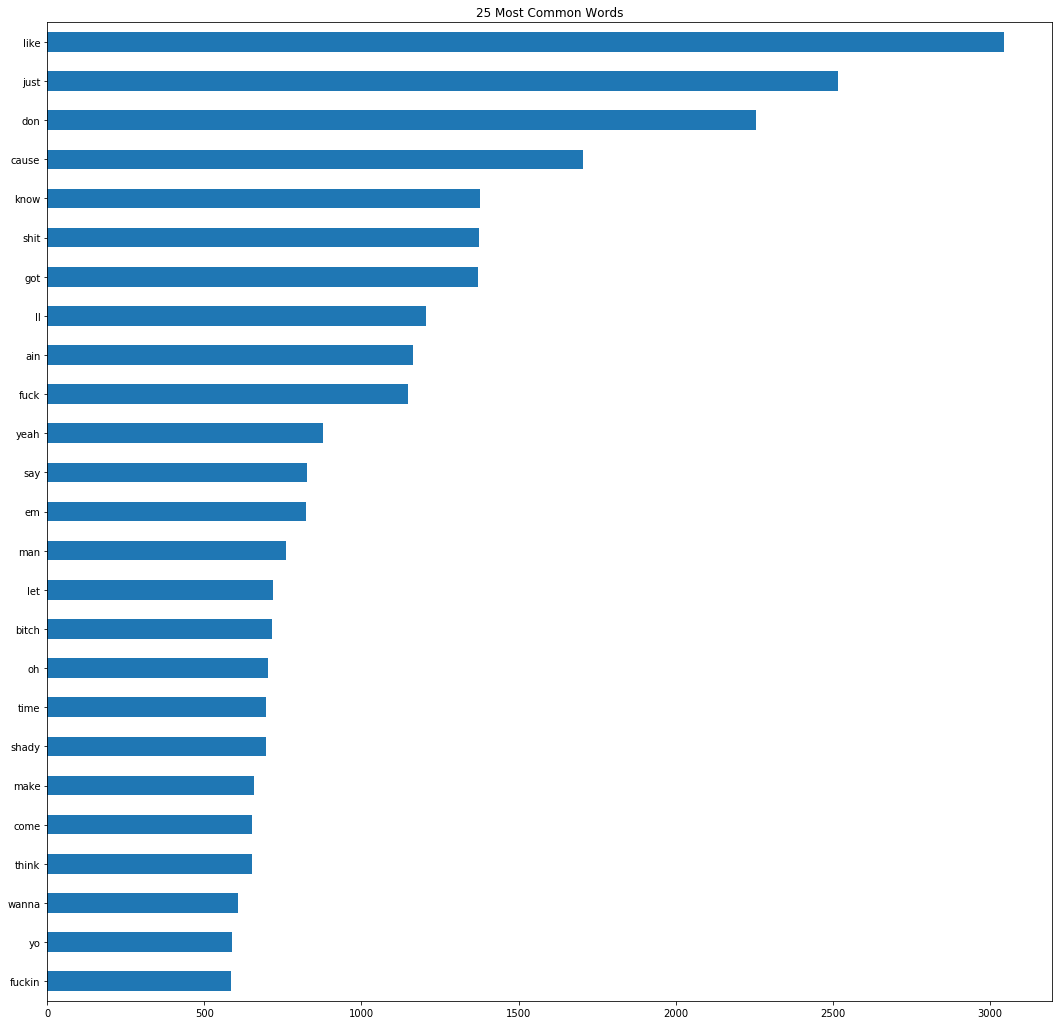

In [199]:
plt.figure(figsize=(18, 18))
plt.title('25 Most Common Words')
lyrics_cvec.sum().sort_values().tail(25).plot.barh(); # checking most popular words across both subreddits
plt.savefig('Most Popular ngram 1,1 Words.png', facecolor='w', bbox_inches='tight') # not much change in top words. more trump though

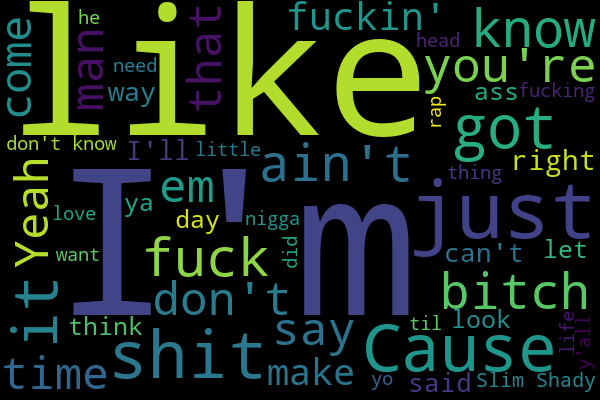

In [166]:
stops = list(ENGLISH_STOP_WORDS) # + ['said', 'say']

wc = wordcloud.WordCloud(width=600, height=400, max_words=50\
                    , stopwords=stops)

text = df_without_headers['lyrics'].str.cat()

wc.generate_from_text(text)
wc.to_image()

In [204]:
cvec_2_2 = CountVectorizer(ngram_range=(2,2), stop_words=ENGLISH_STOP_WORDS, min_df=3)
lyrics_cvec_2_2 = cvec_2_2.fit_transform(df_without_headers['lyrics'])

In [205]:
lyrics_cvec_2_2 = pd.DataFrame(lyrics_cvec_2_2.todense(), columns = cvec_2_2.get_feature_names())

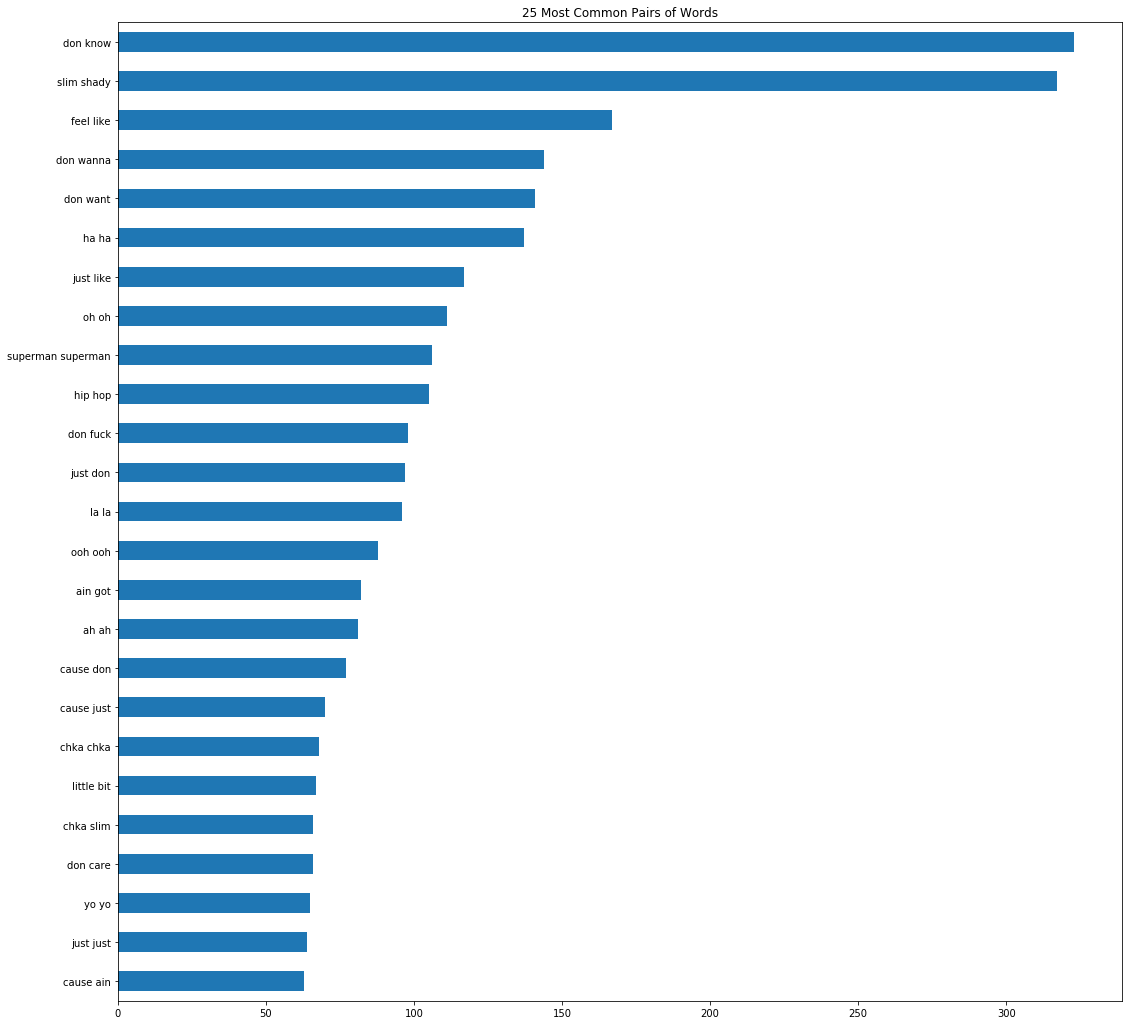

In [206]:
plt.figure(figsize=(18, 18))
plt.title('25 Most Common Pairs of Words')
lyrics_cvec_2_2.sum().sort_values().tail(25).plot.barh(); 
plt.savefig('Most Popular ngram 2,2 Words.png', facecolor='w', bbox_inches='tight')

In [179]:
cvec_3_3 = CountVectorizer(ngram_range=(3,3), stop_words=ENGLISH_STOP_WORDS)
lyrics_cvec_3_3 = cvec_3_3.fit_transform(df_without_headers['lyrics'])

In [181]:
lyrics_cvec_3_3 = pd.DataFrame(lyrics_cvec_3_3.todense(), columns = cvec_3_3.get_feature_names())

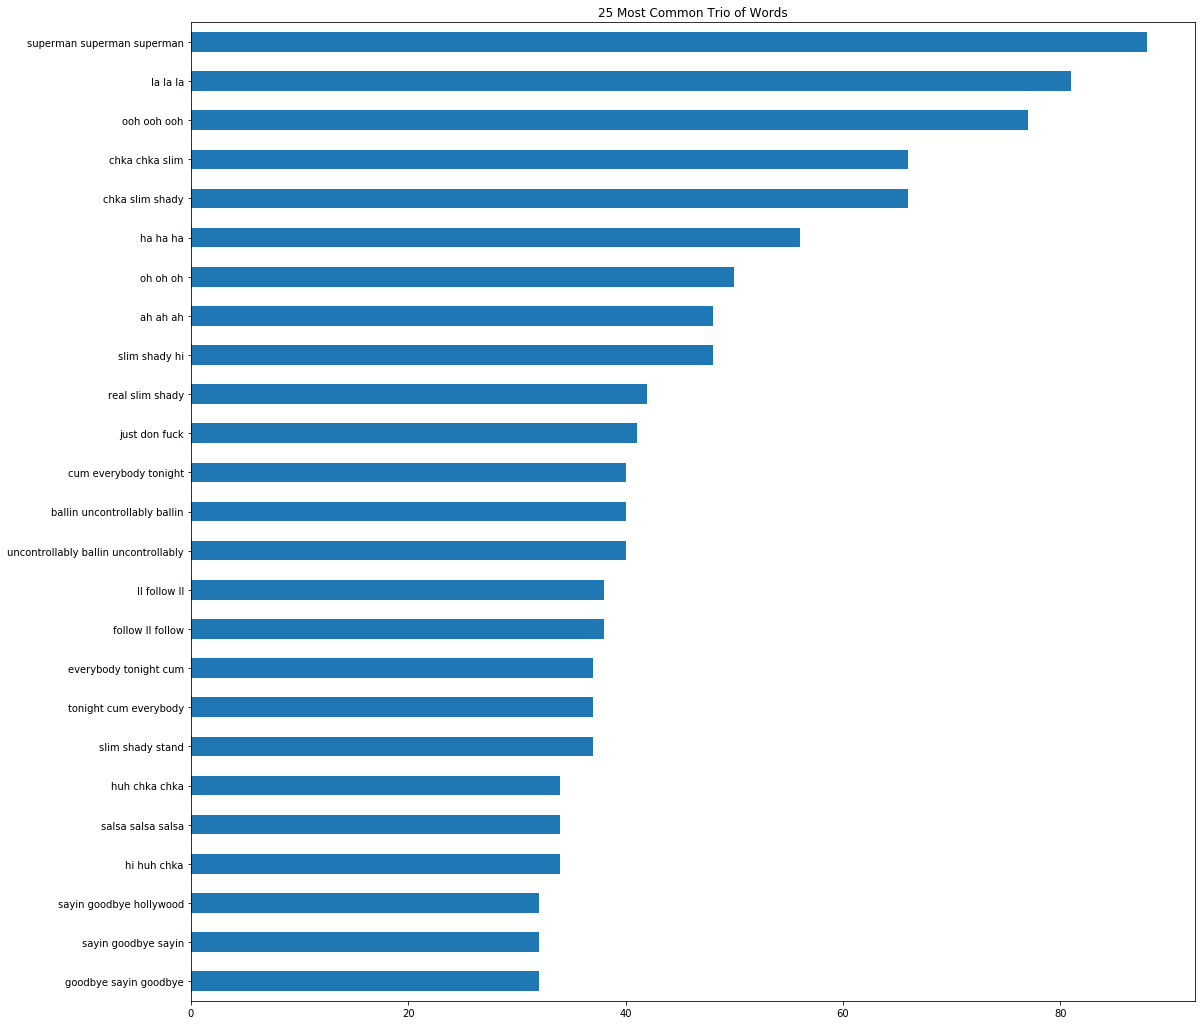

In [203]:
plt.figure(figsize=(18, 18))
plt.title('25 Most Common Trio of Words')
lyrics_cvec_3_3.sum().sort_values().tail(25).plot.barh(); 
plt.savefig('Most Popular ngram 3,3 Words.png', facecolor='w', bbox_inches='tight')

In [207]:
cvec_5_5 = CountVectorizer(ngram_range=(5,5), stop_words=ENGLISH_STOP_WORDS)
lyrics_cvec_5_5 = cvec_5_5.fit_transform(df_without_headers['lyrics'])
lyrics_cvec_5_5 = pd.DataFrame(lyrics_cvec_5_5.todense(), columns = cvec_5_5.get_feature_names())

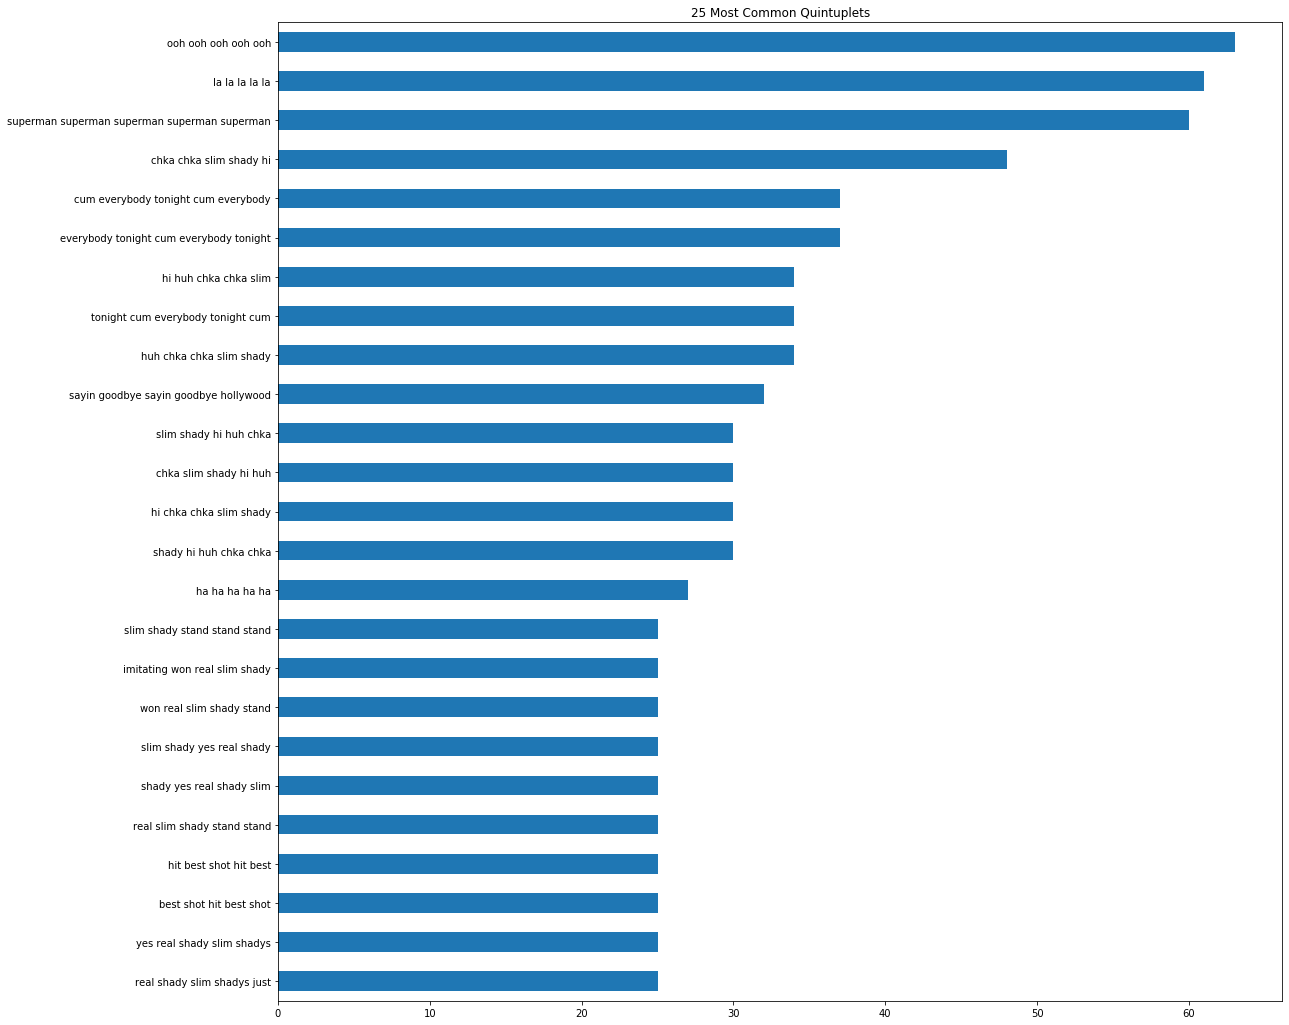

In [209]:
plt.figure(figsize=(18, 18))
plt.title('25 Most Common Quintuplets')
lyrics_cvec_5_5.sum().sort_values().tail(25).plot.barh(); 
plt.savefig('Most Popular ngram 5,5 Words.png', facecolor='w', bbox_inches='tight')

# BONUS JOURNEY LYRICS

In [9]:
journey_with_headers = genius.search_artist("Journey", max_songs=583, sort="title") # having api search for eminem songs.

Searching for songs by Journey...

Song 1: "1990s Theme"
Song 2: "A Better Life"
Song 3: "A Few Coins"
Song 4: "After All These Years"
Song 5: "After the Fall"
Song 6: "All That Really Matters"
Song 7: "All The Things"
Song 8: "All The Way"
Song 9: "Anything Is Possible"
Song 10: "Anytime"
Song 11: "Anyway"
Song 12: "Any Way You Want It"
Song 13: "Ask the Lonely"
Song 14: "Baby I’m a Leavin’ You"
Song 15: "Baby I’m Leaving You"
Song 16: "Back Talk"
Song 17: "Be Good To Yourself"
Song 18: "Believe"
Song 19: "Better Together"
Song 20: "Beyond The Clouds"
Song 21: "Butterfly (She Flies Alone)"
Song 22: "Can Do"
Song 23: "Can’t Tame The Lion"
Song 24: "Castles Burning"
Song 25: "Chain Of Love"
Song 26: "Chain Reaction"
Song 27: "Chain Reaction (Greatest Hits 2 version)"
Song 28: "Change For The Better"
Song 29: "City Of Hope"
Song 30: "City Of Hope (Radio Edit)"
Song 31: "City of the Angels"
Song 32: "Colors Of The Spirit"
Song 33: "Cookie Duster"
Song 34: "Daydream"
Song 35: "Dead Or Aliv

In [10]:
journey_with_headers.save_lyrics() # saving lyrics of songs to json file

Wrote `Lyrics_Journey.json`


In [134]:
with open('./Lyrics_Journey.json') as json_file:
    data = json.load(json_file)

In [135]:
lyrics_by_song = []
album = []
song_names = [] 
song_index_integer = -1 # skipping the first 3 
for song in data['songs']:
    while song_index_integer != len(data['songs']) - 1:
        song_index_integer = song_index_integer + 1
        song_lyrics = data['songs'][song_index_integer]['lyrics']
        song_title = data['songs'][song_index_integer]['title']
        if song_lyrics is None:
            print(f"Skipped lyrics from song #{song_index_integer}: {data['songs'][song_index_integer]['title']}")
            pass
#         elif data['songs'][song_index_integer]['album']['name'] is None:
#             album.append("Non-Album Release")
#             split_song_lyrics = song_lyrics.split('\n')
#             lyrics_by_song.append(split_song_lyrics)
        else:
            split_song_lyrics = song_lyrics.split('\n')
            #album_name = data['songs'][song_index_integer]['album']['name']
            lyrics_by_song.append(split_song_lyrics)
            song_names.append(song_title)
            print(f"Grabbed lyrics from song #{song_index_integer}: {data['songs'][song_index_integer]['title']}")

len(lyrics_by_song)
len(song_names)
journey_final_dict = dict(zip(song_names, lyrics_by_song)) # song name are keys, lyrics per song are values.

Grabbed lyrics from song #0: 1990s Theme
Grabbed lyrics from song #1: A Better Life
Grabbed lyrics from song #2: A Few Coins
Grabbed lyrics from song #3: After All These Years
Grabbed lyrics from song #4: After the Fall
Grabbed lyrics from song #5: All That Really Matters
Grabbed lyrics from song #6: All The Things
Grabbed lyrics from song #7: All The Way
Grabbed lyrics from song #8: Anything Is Possible
Grabbed lyrics from song #9: Anytime
Grabbed lyrics from song #10: Anyway
Grabbed lyrics from song #11: Any Way You Want It
Grabbed lyrics from song #12: Ask the Lonely
Grabbed lyrics from song #13: Baby I’m a Leavin’ You
Grabbed lyrics from song #14: Baby I’m Leaving You
Grabbed lyrics from song #15: Back Talk
Grabbed lyrics from song #16: Be Good To Yourself
Grabbed lyrics from song #17: Believe
Grabbed lyrics from song #18: Better Together
Grabbed lyrics from song #19: Beyond The Clouds
Grabbed lyrics from song #20: Butterfly (She Flies Alone)
Grabbed lyrics from song #21: Can Do
Gr

In [136]:
journey_final_dict

{'1990s Theme': ['Instrumental'],
 'A Better Life': ['[Verse 1]',
  'Morning sunlight on her face',
  'As he wakes her with a kiss',
  'She has been everything he wanted',
  'They were married as high school sweethearts',
  "Never dreamed it'd be like this",
  'Finding nothing for them comes easy',
  'Trying hard just to make a living',
  'Seems life will not give them a break',
  'Well as long as they have got each other',
  'Ooh, they will find a way',
  '',
  '[Chorus]',
  'There is a better life',
  'Waiting out there somewhere',
  'They got to learn to fly',
  'Need to spread their wings to soar',
  'There is a better life',
  'They will find it together (keep holding on)',
  'She shows him rainbows every time he sees her smile',
  '',
  '[Verse 2]',
  'They have been more than lovers',
  'There is no mountain they cannot climb',
  'Cannot stop dreaming dreams together',
  'Got to rise above the crossroads',
  'Beyond the streets they were born',
  'To a place where prayers are an

In [139]:
journey_lyrics_by_song_df = pd.DataFrame.from_dict(journey_final_dict, orient='index')
journey_lyrics_by_song_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
1990s Theme,Instrumental,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A Better Life,[Verse 1],Morning sunlight on her face,As he wakes her with a kiss,She has been everything he wanted,They were married as high school sweethearts,Never dreamed it'd be like this,Finding nothing for them comes easy,Trying hard just to make a living,Seems life will not give them a break,Well as long as they have got each other,...,None,None,None,None,None,None,None,None,None,None
A Few Coins,[Instrumental],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
After All These Years,[Verse],A faded wedding photograph,You and me in our first dance,The lives of those,We lost in once sweet embrace,Since those days our world has changed,Our love remains the same,God knows we have had our share of saving grace,And I am proud of all the blessings,You have given me,...,None,None,None,None,None,None,None,None,None,None
After the Fall,[Verse 1],So now love is gone,"I can't t go on, love is gone",I want to say,Now it's just too late,Waited far too long,,[Chorus],Should have told you then I knew,Should have told you right,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wildest Dream (live),Two different worlds collide,Somehow come together,Caught in the moment,Blind with desire,The way I want of you,I should have known better,Moving way too fast,Jumping through the fire,,I can't regret you,...,None,None,None,None,None,None,None,None,None,None
Winds Of March,[Verse],I covered you with roses,Like the stars at night,I covered you with love,Like a blanket on a cold winter's night,I covered you with joy,To make your lifetime big and bright,You touched me with your eyes,Soft as an evening breeze,You held me in your arms,...,None,None,None,None,None,None,None,None,None,None
With Your Love,[Verse],On this day... To be standing here with you,There's no doubt: I know this love is true,See my tears... Only you can understand,A state of grace... I feel blessed to hold you...,There's a room in my heart and you've unlocked,A door,That no one's ever opened before,,[Chorus][x2],...,None,None,None,None,None,None,None,None,None,None
World Gone Wild,[Verse 1],"See the signs, madness all around us",Somewhere I hear sirens wailing thru the night,"Read The Times, starts to make me wonder is there",More to life than black and white,,[Bridge],I'd never thought I'd question (thought I'd qu...,The doubt I'm seeing everywhere (doubt I'm see...,Standing here beside me you're the answer (you...,...,None,None,None,None,None,None,None,None,None,None
